# Capstone Project- Cancer Genomics (Dimensionality Reduction and Predictive Machine Learning)

#### Ryan Butler

#### The purpose of this notebook is reduce the dimensionionality of a dataset containing thousands of cancer genes and extract insights


## EDA

### Load Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Dataset/data.csv')
labels = pd.read_csv('Dataset/labels.csv')

In [3]:
data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [4]:
labels.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


### Merge Datasets

In [5]:
data = pd.merge(data, labels, on="Unnamed: 0")
data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [6]:
data = data.set_index('Unnamed: 0')
data.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [7]:
# Check for missing values
sum(data.isna().sum())

0

### Plot Hierarchically-Clustered Heatmap

In [8]:
# cluster_data = data.drop('Class', axis=1)
# sns.clustermap(cluster_data)

### Null-Hypothesis Testing

In [9]:
data['Class'].value_counts()

Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64

Given the value counts above (more than 2 variables), we should do some preliminary testing with ANOVA

array([[<Axes: title={'center': 'gene_1'}>,
        <Axes: title={'center': 'gene_2'}>]], dtype=object)

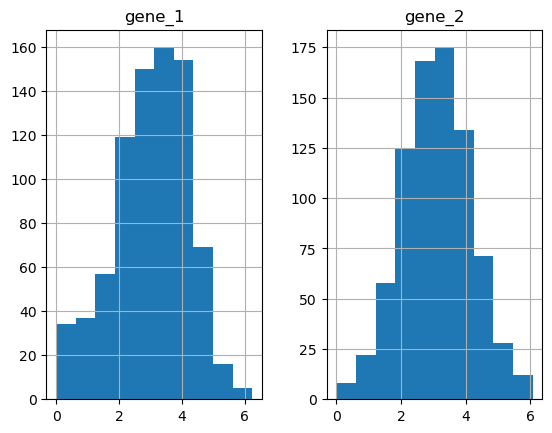

In [10]:
data[['gene_1', 'gene_2']].hist()

Both genes are relatively normally distributed, as such we can run the ANOVA analysis

In [11]:
# Gene_1 Data
gene_1_brca = data['gene_1'].loc[data['Class'] == 'BRCA']
gene_1_kirc = data['gene_1'].loc[data['Class'] == 'KIRC']
gene_1_luad = data['gene_1'].loc[data['Class'] == 'LUAD']
gene_1_prad = data['gene_1'].loc[data['Class'] == 'PRAD']
gene_1_coad = data['gene_1'].loc[data['Class'] == 'COAD']

# Gene_2 Data
gene_2_brca = data['gene_2'].loc[data['Class'] == 'BRCA']
gene_2_kirc = data['gene_2'].loc[data['Class'] == 'KIRC']
gene_2_luad = data['gene_2'].loc[data['Class'] == 'LUAD']
gene_2_prad = data['gene_2'].loc[data['Class'] == 'PRAD']
gene_2_coad = data['gene_2'].loc[data['Class'] == 'COAD']

In [12]:
data.columns

Index(['gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5', 'gene_6',
       'gene_7', 'gene_8', 'gene_9',
       ...
       'gene_20522', 'gene_20523', 'gene_20524', 'gene_20525', 'gene_20526',
       'gene_20527', 'gene_20528', 'gene_20529', 'gene_20530', 'Class'],
      dtype='object', length=20532)

In [13]:
from scipy.stats import f_oneway
gene_1_anova = f_oneway(gene_1_brca, gene_1_kirc, gene_1_luad, gene_1_prad, gene_1_coad)
gene_1_anova

F_onewayResult(statistic=23.11246471467732, pvalue=4.315349359726914e-18)

In [14]:
gene_2_anova = f_oneway(gene_2_brca, gene_2_kirc, gene_2_luad, gene_2_prad, gene_2_coad)
gene_2_anova

F_onewayResult(statistic=60.132731354688204, pvalue=2.1468844023159446e-44)

We can also iterate through all the genes with a for loop

In [15]:
significant_count = 0
insignificant_count = 0
nonsignificant_variables = []
significant_variables = []
for gene in data.columns:
    if gene == 'Class':
        continue
    elif gene == 'Unnamed: 0':
        continue
    else:
        gene_brca = data[gene].loc[data['Class'] == 'BRCA']
        gene_kirc = data[gene].loc[data['Class'] == 'KIRC']
        gene_luad = data[gene].loc[data['Class'] == 'LUAD']
        gene_prad = data[gene].loc[data['Class'] == 'PRAD']
        gene_coad = data[gene].loc[data['Class'] == 'COAD']
    anova = f_oneway(gene_brca,gene_kirc,gene_luad,gene_prad,gene_coad)
    # Below gives us p-value
    if anova[1] <= 0.05:
#         print(f'{gene} ANOVA result is: significant')
        significant_count += 1
        significant_variables.append(gene)
    if anova[1] > 0.05:
        insignificant_count += 1
        nonsignificant_variables.append(gene)

In [16]:
print(f'ANOVA returned significant results for {significant_count} genes')

ANOVA returned significant results for 19571 genes


In [17]:
print(f'ANOVA returned significant results for {insignificant_count} genes')

ANOVA returned significant results for 693 genes


From the above hyptohesis testing we can conclude the majority of the class group means are significantly different from each other

Project Task: Week 2: 

Dimensionality Reduction:

    Each sample has expression values for around 20K genes. However, it may not be necessary to include all 20K genes expression values to analyze each cancer type. Therefore, we will identify a smaller set of attributes which will then be used to fit multiclass classification models. So, the first task targets the dimensionality reduction using various techniques such as,
    PCA, LDA, and t-SNE.
    Input: Complete dataset including all genes (20531)
    Output: Selected Genes from each dimensionality reduction method


## Dimensionality Reduction

Perform PCA

Try to capture 90-95% variance of principal components

In [18]:
features = data.iloc[:,:-1].values
label = data.iloc[:,-1].values

In [19]:
#Perform Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = sc.fit_transform(features)

In [20]:
len(features)

801

In [21]:
# Start with all the features then narrow it down
from sklearn.decomposition import PCA
principalComponents = PCA(n_components=801)
principalComponents.fit(features)

PCA(n_components=801)

Keep below commented out so we can submit the notebook without going over the file size limit, however for a real-life scenario we can use this line to get a peek at the variance explained ratios

In [22]:
# principalComponents.explained_variance_ratio_

Text(0.5, 1.0, 'Scree Plot')

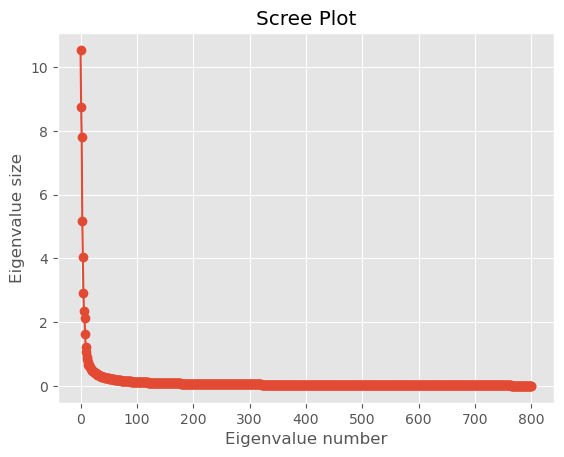

In [23]:
import matplotlib.pyplot as plt
plt.style.use("ggplot") 
plt.plot(principalComponents.explained_variance_ratio_*100, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

From the scree plot we can see that about 100 components explains the majority of the variance,
however, running sum we see that we are still short of 90%-95% of variance explained.  So lets try a few different numbers until we reach 95% variance

In [24]:
from sklearn.decomposition import PCA
principalComponents = PCA(n_components=550)
principalComponents.fit(features)

PCA(n_components=550)

Text(0.5, 1.0, 'Scree Plot')

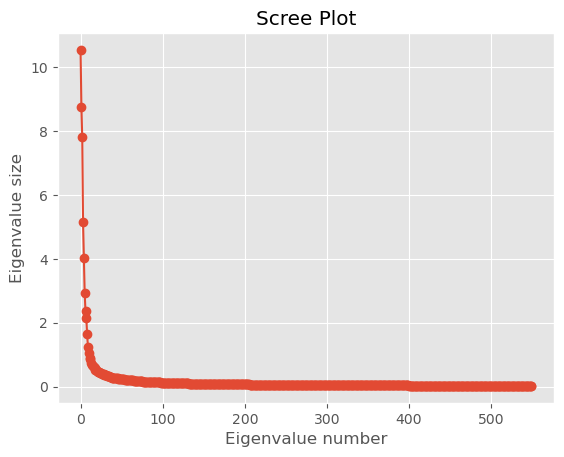

In [25]:
import matplotlib.pyplot as plt
plt.style.use("ggplot") 
plt.plot(principalComponents.explained_variance_ratio_*100, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

In [26]:
sum(principalComponents.explained_variance_ratio_)*100

95.35541272490826

n_components=550 explains just over 95% of the variance! Lets move forward with this!

In [27]:
features = principalComponents.fit_transform(features)

Extract the genes contributing the most to each of the components

In [28]:
# number of components
n_pcs = features.shape[1]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(features[i]).argmax() for i in range(n_pcs)]

initial_feature_names = list(data.columns)[:-1]

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
gene_dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

#  gene_dic 

In [29]:
# Get genes contributing to the most components:
count_genes = {}

for gene in gene_dic.values():
    count_genes[gene] = count_genes.get(gene,0)+1
count_genes = {k: v for k, v in sorted(count_genes.items(), key=lambda item: item[1], reverse=True)}

genes_list = list(count_genes.keys())
genes_list_2 = list(count_genes.values())
for i in range(6):
    print(f'{genes_list[i]}: {genes_list_2[i]}')
    

gene_1: 139
gene_0: 120
gene_2: 107
gene_4: 61
gene_3: 42
gene_6: 29


As we can see above, the top 5 genes making the most contributions to the principal components are:
 * gene_1
 * gene_0
 * gene_2
 * gene_4
 * gene_3

Project Task: Week 3: 

Clustering Genes and Samples:

Our next goal is to identify groups of genes that behave similarly across samples and identify the distribution of samples corresponding to each cancer type. Therefore, this task focuses on applying various clustering techniques, e.g., k-means, hierarchical, and mean-shift clustering, on genes and samples.

 

First, apply the given clustering technique on all genes to identify:

    Genes whose expression values are similar across all samples

    Genes whose expression values are similar across samples of each cancer type 

 

Next, apply the given clustering technique on all samples to identify:

    Samples of the same class (cancer type) which also correspond to the same cluster

    Samples identified to be belonging to another cluster but also to the same class (cancer type)


### K-Means Clustering

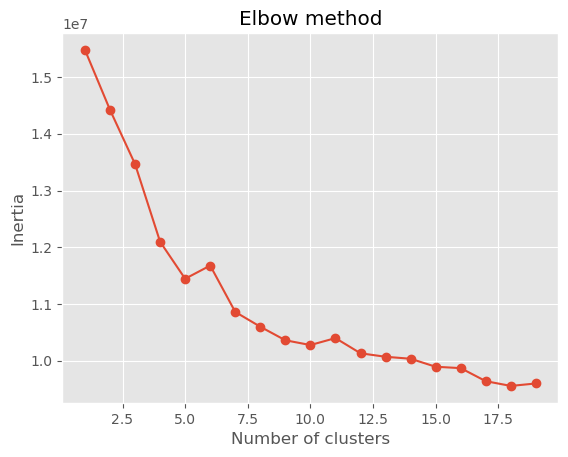

In [30]:
from sklearn.cluster import KMeans

inertias = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features)
    inertias.append(kmeans.inertia_)


plt.plot(range(1,20), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

Looking at the above k-means, we can see that about 5 clusters (at the elbow) is the optimal number 

In [31]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(features)

KMeans(n_clusters=5)

In [32]:
gene_group = kmeans.predict(features)

In [33]:
final_df = pd.DataFrame(features)
final_df['gene_combo_category'] = gene_group
final_df['Class'] = label
final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,542,543,544,545,546,547,548,549,gene_combo_category,Class
0,-57.446987,-95.410981,74.301543,12.166781,-7.981831,-36.157573,-7.668542,19.951444,0.142216,-3.035240,...,1.407811,2.449247,-1.340179,-2.393026,-1.561597,-3.525828,-1.417082,-0.407516,0,PRAD
1,-16.919430,-0.732470,-64.072900,2.095308,25.426430,-27.784178,-16.132765,-17.031383,-22.023874,27.923308,...,-0.071918,-0.077190,0.626931,-0.866328,-1.697247,-2.122296,-1.288284,-0.910641,3,LUAD
2,-70.345218,19.303327,20.488240,-48.102893,-24.437757,-17.462510,20.706772,-47.626817,-28.647648,12.784676,...,-0.528153,0.486212,-0.782584,0.936948,0.498264,0.903743,-0.542582,-0.393348,0,PRAD
3,-49.161591,9.227586,61.243770,-37.805744,-1.038889,-23.240002,-4.801039,-21.554809,-15.375067,12.881511,...,-1.501162,-4.740543,-2.391303,-0.260065,-0.442672,-0.775209,2.275572,3.527905,0,PRAD
4,-18.132534,51.327797,16.598116,17.699201,-26.389130,1.551573,-6.266101,12.336677,-4.233837,-28.804476,...,-1.370300,2.842901,-3.691880,3.033606,4.573275,0.813005,1.050984,3.441734,2,BRCA


### Gene Cluster Representation in Cancer Type

In [34]:
final_df['gene_combo_category'].unique()

array([0, 3, 2, 4, 1], dtype=int32)

In [35]:
final_df[['Class', 'gene_combo_category']].value_counts()

Class  gene_combo_category
BRCA   2                      234
KIRC   4                      145
LUAD   3                      141
PRAD   0                      134
COAD   1                       74
BRCA   3                       65
COAD   3                        4
BRCA   0                        1
KIRC   3                        1
PRAD   2                        1
       3                        1
Name: count, dtype: int64

<Axes: xlabel='Class,gene_combo_category'>

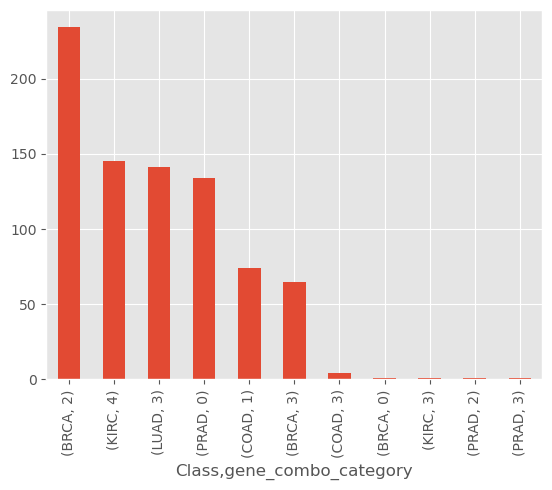

In [36]:
final_df[['Class', 'gene_combo_category']].value_counts().plot(kind='bar')

From the above we can see the combos of gene clusters in regards to cancer type
* Cluster 0 represents the majority of BRCA cases
* Cluster 3 represents the majority of KIRC cases
* Cluster 4 represents the majority of LUAD cases
* Cluster 1 represents the majority of PRAD cases
* Cluster 2 represents the majority of COAD cases

Interestingly, cluster 4 is also present in some BRCA, COAD, and KIRC cases

Project Task: Week 4: 

Building Classification Model(s) with Feature Selection:

Our final task is to build a robust classification model(s) for identifying each type of cancer.

Sub-tasks:

    Build a classification model(s) using multiclass SVM, Random Forest, and Deep Neural Network to classify the input data into five cancer types

    Apply the feature selection algorithms, forward selection, and backward elimination to refine selected attributes (selected in Task-2) using the classification model from the previous step

    Validate the genes selected from the last step using statistical significance testing (t-test for one vs. all and F-test)

### Get Final Dataset

In [37]:
final_data = pd.concat([final_df.iloc[:,:-2],
                        pd.get_dummies(final_df['gene_combo_category']),
                        final_df.iloc[:,[-1]]],
                        axis = 1)
# pd.get_dummies(final_df['gene_combo_category'], )
final_data.head()

,0,1,2,3,4,5,6,7,8,9,...,546,547,548,549,0,1,2,3,4,Class
0,-57.446987,-95.410981,74.301543,12.166781,-7.981831,-36.157573,-7.668542,19.951444,0.142216,-3.035240,...,-1.561597,-3.525828,-1.417082,-0.407516,True,False,False,False,False,PRAD
1,-16.919430,-0.732470,-64.072900,2.095308,25.426430,-27.784178,-16.132765,-17.031383,-22.023874,27.923308,...,-1.697247,-2.122296,-1.288284,-0.910641,False,False,False,True,False,LUAD
2,-70.345218,19.303327,20.488240,-48.102893,-24.437757,-17.462510,20.706772,-47.626817,-28.647648,12.784676,...,0.498264,0.903743,-0.542582,-0.393348,True,False,False,False,False,PRAD
3,-49.161591,9.227586,61.243770,-37.805744,-1.038889,-23.240002,-4.801039,-21.554809,-15.375067,12.881511,...,-0.442672,-0.775209,2.275572,3.527905,True,False,False,False,False,PRAD
4,-18.132534,51.327797,16.598116,17.699201,-26.389130,1.551573,-6.266101,12.336677,-4.233837,-28.804476,...,4.573275,0.813005,1.050984,3.441734,False,False,True,False,False,BRCA


In [38]:
# Separate out features and labels
features = final_df.iloc[:,:-1].values
label = final_df.iloc[:,[-1]].values

# features = final_data.iloc[:,:-1].values
# label = final_data.iloc[:,[-1]].values

In [39]:
# Preprocess Label (Label Encoder)
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
label = lb.fit_transform(label)

### Split into Train/Test Data

In [40]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=23)

### SVM Classifier Model

In [41]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train.ravel())

SVC(kernel='linear')

In [42]:
print(svc_model.score(X_train,y_train.ravel()))
print(svc_model.score(X_test,y_test.ravel()))

1.0
1.0


Perfect model trained! 

### Random Forest Model

In [43]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train.ravel())

RandomForestClassifier()

In [44]:
print(random_forest.score(X_train,y_train.ravel()))
print(random_forest.score(X_test,y_test.ravel()))

1.0
0.9316770186335404


### Deep Neural Net Model

In [45]:
from tensorflow import keras

2025-06-26 22:15:00.267188: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [46]:
final_data['Class'].nunique()

5

In [47]:
model_nn = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

2025-06-26 22:15:01.469144: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [48]:
model_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                8280      
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 8,495
Trainable params: 8,495
Non-trainable params: 0
_________________________________________________________________


In [49]:
epochs = 15

callbacks = [
    keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
]

model_nn.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

history = model_nn.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=10,
    callbacks=callbacks,
    validation_split=0.2,
)

Epoch 1/15
52/52 [==============================] - 1s 6ms/step - loss: 4.9320 - accuracy: 0.2285 - val_loss: 2.5328 - val_accuracy: 0.4141
Epoch 2/15
52/52 [==============================] - 0s 2ms/step - loss: 1.1514 - accuracy: 0.6348 - val_loss: 1.2829 - val_accuracy: 0.6016
Epoch 3/15
52/52 [==============================] - 0s 3ms/step - loss: 0.3900 - accuracy: 0.8867 - val_loss: 0.8917 - val_accuracy: 0.7266
Epoch 4/15
52/52 [==============================] - 0s 3ms/step - loss: 0.1811 - accuracy: 0.9609 - val_loss: 0.7478 - val_accuracy: 0.7734
Epoch 5/15
52/52 [==============================] - 0s 3ms/step - loss: 0.1158 - accuracy: 0.9766 - val_loss: 0.6517 - val_accuracy: 0.7891
Epoch 6/15
52/52 [==============================] - 0s 3ms/step - loss: 0.0795 - accuracy: 0.9883 - val_loss: 0.5947 - val_accuracy: 0.8047
Epoch 7/15
52/52 [==============================] - 0s 3ms/step - loss: 0.0613 - accuracy: 0.9883 - val_loss: 0.5539 - val_accuracy: 0.8203
Epoch 8/15
52/52 [==

In [50]:
# Define a function to plot the accuracy/loss
def plot_accuracy_loss(history, x, x_loss, label1, label2):
    # Use the History object we created to get our saved performance results
    history_dict = history.history

    # Extract the loss and validation losses
    loss_values = history_dict[x]
    val_loss_values = history_dict[x_loss]

    # Get the number of epochs and create an array up to that number using range()
    epochs = range(1, len(loss_values) + 1)

    # Plot line charts for both Validation and Training Loss
    line1 = plt.plot(epochs, val_loss_values, label=label1)
    line2 = plt.plot(epochs, loss_values, label=label2)
    plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
    plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
    plt.xlabel('Epochs') 
    plt.ylabel(x)
    plt.grid(True)
    plt.legend()
    plt.show()

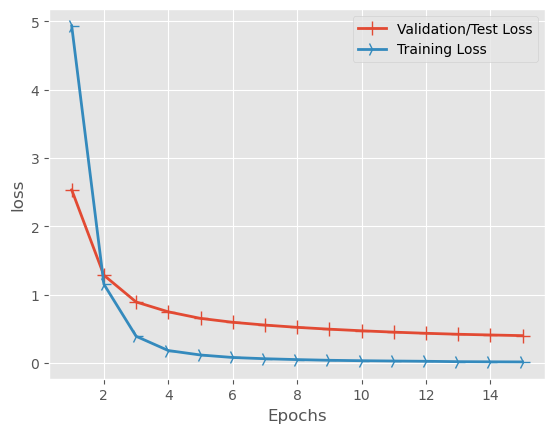

In [51]:
plot_accuracy_loss(history, 'loss', 'val_loss', 'Validation/Test Loss', 'Training Loss')

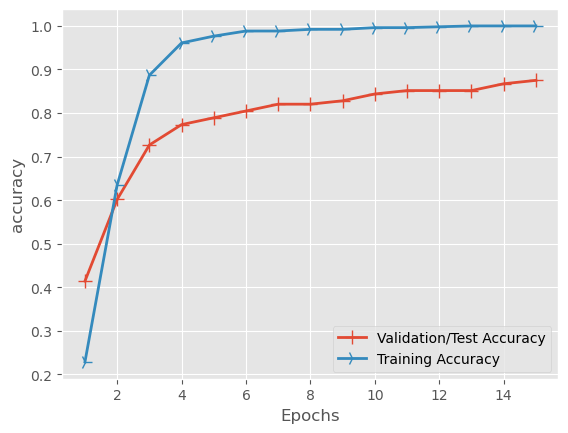

In [52]:
plot_accuracy_loss(history, 'accuracy', 'val_accuracy', 'Validation/Test Accuracy', 'Training Accuracy')

In [53]:
model_nn.evaluate(X_test, y_test)

6/6 [==============================] - 0s 35ms/step - loss: 0.5365 - accuracy: 0.8509


[0.5364610552787781, 0.850931704044342]

Model is overfitting a bit, but it is still performing relatively well on the training data

### One vs All (One Sample ttest)

In [54]:
data.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [55]:
# Get population mean
mean_data = data.drop('Class', axis=1)
pop_mean = mean_data.stack().dropna().mean()
pop_mean

6.443322266573218

In [56]:
import scipy.stats as stats

t_statistic, p_value = stats.ttest_1samp(a=final_df.drop(['Class','gene_combo_category'], axis=1), popmean=pop_mean)

count_1sample = 0
for x in p_value:
    if x <= 0.05:
        count_1sample +=1 
count_1sample

550

As we can see above, the 1 sample ttest vs the population mean from the original dataset all show as signifnicant 

#### From the previous models trained, we can see that SVM performed the best with 1.0 accuracy on both the training and test sets after dimensionality reduction.  Therefore, we should select this model for deployment